## Example: Applying TigerTail to Birthday Gift Data

In this notebook, we create 2 datasets and use them to demonstrate the use of the classes in the TigerTail library. The first dataset contains the timestamps at which Cassie receives a birthday gift on her birthday, along with a rating from 0-1 of how much she liked the gift. The second dataset contains Cassie's heart rate per minute of her birthday. All of this data is contained within the time range of 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../TT')
from tigertail import TimeFrame, TimeSeries, EventSeries

Here we generate a dataframe with the timestamps at which Cassie receives a gift during her birthday and her rating of each gift. We choose the gift timestamps at random from a date_range of timestamps from 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [2]:
timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-19 00:00:00', freq='1min')

gift_timestamp = np.random.choice(timestamp, size=100)
gift_timestamp

array(['1999-11-18T08:04:00.000000000', '1999-11-18T15:18:00.000000000',
       '1999-11-18T12:44:00.000000000', '1999-11-18T12:54:00.000000000',
       '1999-11-18T04:38:00.000000000', '1999-11-18T09:24:00.000000000',
       '1999-11-18T16:15:00.000000000', '1999-11-18T22:51:00.000000000',
       '1999-11-18T18:02:00.000000000', '1999-11-18T01:52:00.000000000',
       '1999-11-18T01:42:00.000000000', '1999-11-18T18:40:00.000000000',
       '1999-11-18T15:33:00.000000000', '1999-11-18T16:47:00.000000000',
       '1999-11-18T21:22:00.000000000', '1999-11-18T10:29:00.000000000',
       '1999-11-18T16:58:00.000000000', '1999-11-18T03:04:00.000000000',
       '1999-11-18T14:30:00.000000000', '1999-11-18T10:38:00.000000000',
       '1999-11-18T09:13:00.000000000', '1999-11-18T08:52:00.000000000',
       '1999-11-18T08:14:00.000000000', '1999-11-18T10:00:00.000000000',
       '1999-11-18T11:53:00.000000000', '1999-11-18T20:40:00.000000000',
       '1999-11-18T08:41:00.000000000', '1999-11-18

                     gift_rating
1999-11-18 00:25:00     0.282946
1999-11-18 00:58:00     0.903267
1999-11-18 01:07:00     0.540602
1999-11-18 01:42:00     0.241085
1999-11-18 01:52:00     0.666049
...                          ...
1999-11-18 22:51:00     0.514467
1999-11-18 22:51:00     0.140996
1999-11-18 23:02:00     0.831958
1999-11-18 23:29:00     0.179815
1999-11-18 23:50:00     0.617756

[100 rows x 1 columns]


<Axes: title={'center': 'Gifts and their ratings'}>

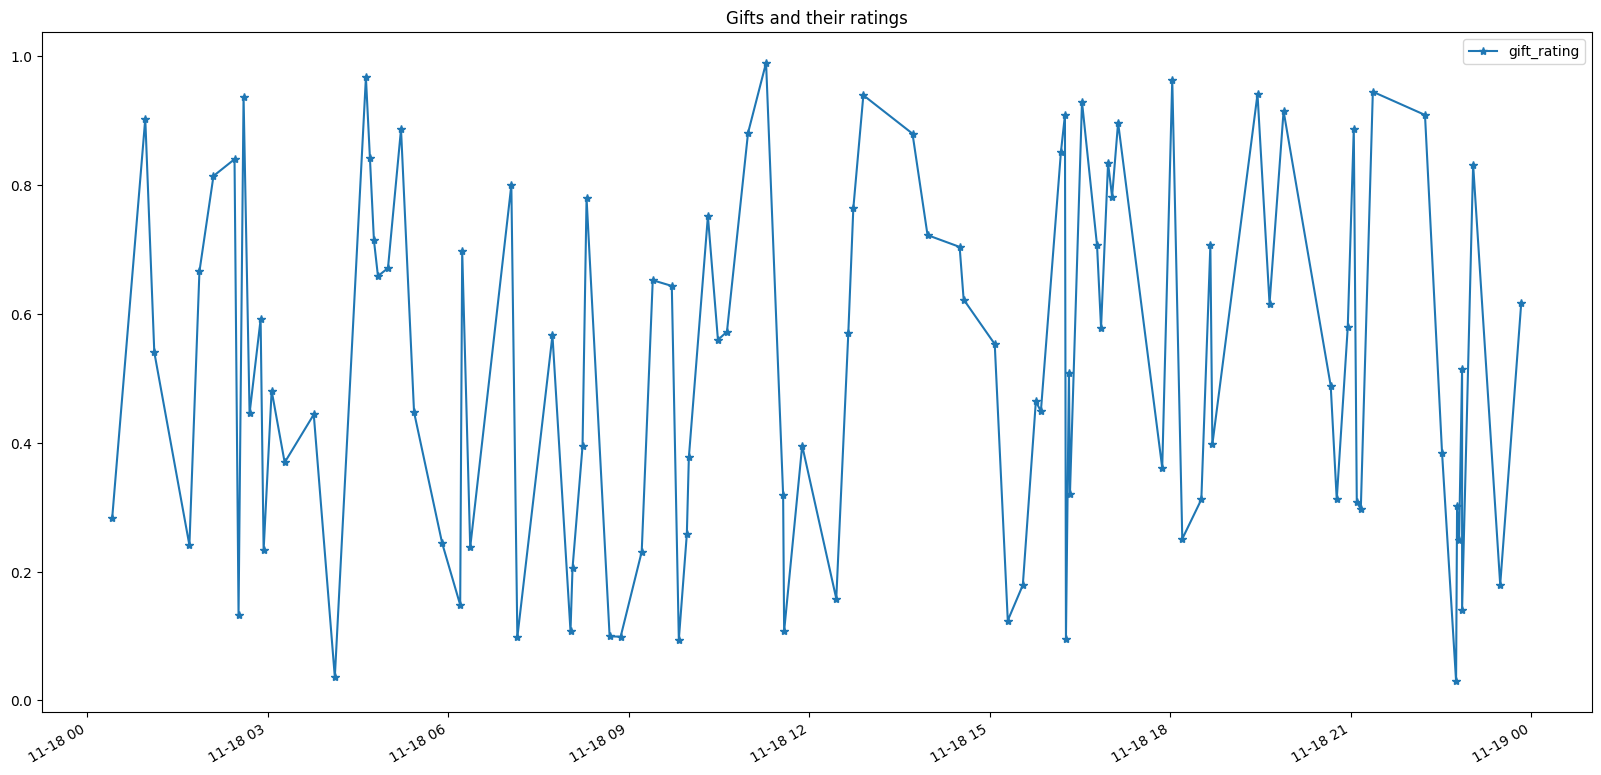

In [3]:
gift_ratings = np.random.random(100)
gift_df = pd.DataFrame({'gift_rating': gift_ratings}, index=gift_timestamp)
gift_df.sort_index(inplace=True)
print(gift_df)
gift_df.plot(title='Gifts and their ratings', figsize=(20,10), marker='*')

Now we create an EventSeries object using the birthday gift dataframe. We specify `np.mean` as the default aggregation function.

In [5]:
gift_es = EventSeries(gift_df, agg_func=np.mean)

We demonstrate how to window the gift event series data with 1 hour and 5 minute windows.

In [6]:
# demo the EventSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

window_es_h = gift_es.window('1h')
window_es_h

1999-11-18 00:00:00    0.593106
1999-11-18 01:00:00    0.482579
1999-11-18 02:00:00    0.570758
1999-11-18 03:00:00    0.431536
1999-11-18 04:00:00    0.643838
1999-11-18 05:00:00    0.562564
1999-11-18 06:00:00    0.361410
1999-11-18 07:00:00    0.488420
1999-11-18 08:00:00    0.280986
1999-11-18 09:00:00    0.375978
1999-11-18 10:00:00    0.628610
1999-11-18 11:00:00    0.453192
1999-11-18 12:00:00    0.608159
1999-11-18 13:00:00    0.801299
1999-11-18 14:00:00    0.663378
1999-11-18 15:00:00    0.353957
1999-11-18 16:00:00    0.637203
1999-11-18 17:00:00    0.680178
1999-11-18 18:00:00    0.526273
1999-11-18 19:00:00    0.824223
1999-11-18 20:00:00    0.460100
1999-11-18 21:00:00    0.609520
1999-11-18 22:00:00    0.361480
1999-11-18 23:00:00    0.543176
Freq: h, dtype: float64

<Axes: title={'center': 'Average gift rating for every 1 hr window'}>

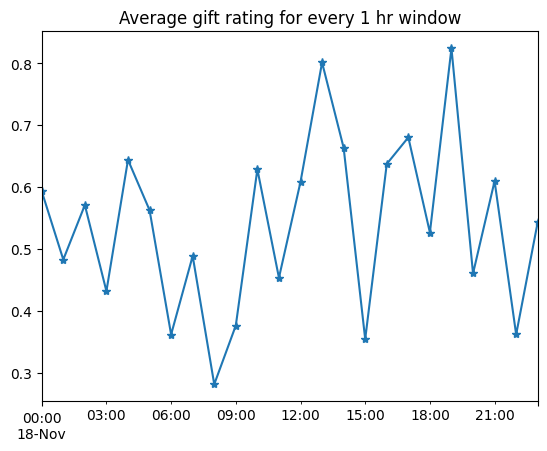

In [7]:
window_es_h.plot(title='Average gift rating for every 1 hr window', marker='*')

In [8]:
window_es_min = gift_es.window('5min')
window_es_min

1999-11-18 00:25:00    0.282946
1999-11-18 00:30:00    0.000000
1999-11-18 00:35:00    0.000000
1999-11-18 00:40:00    0.000000
1999-11-18 00:45:00    0.000000
                         ...   
1999-11-18 23:30:00    0.000000
1999-11-18 23:35:00    0.000000
1999-11-18 23:40:00    0.000000
1999-11-18 23:45:00    0.000000
1999-11-18 23:50:00    0.617756
Freq: 5min, Length: 282, dtype: float64

<Axes: title={'center': 'Average gift rating for every 5 min window'}>

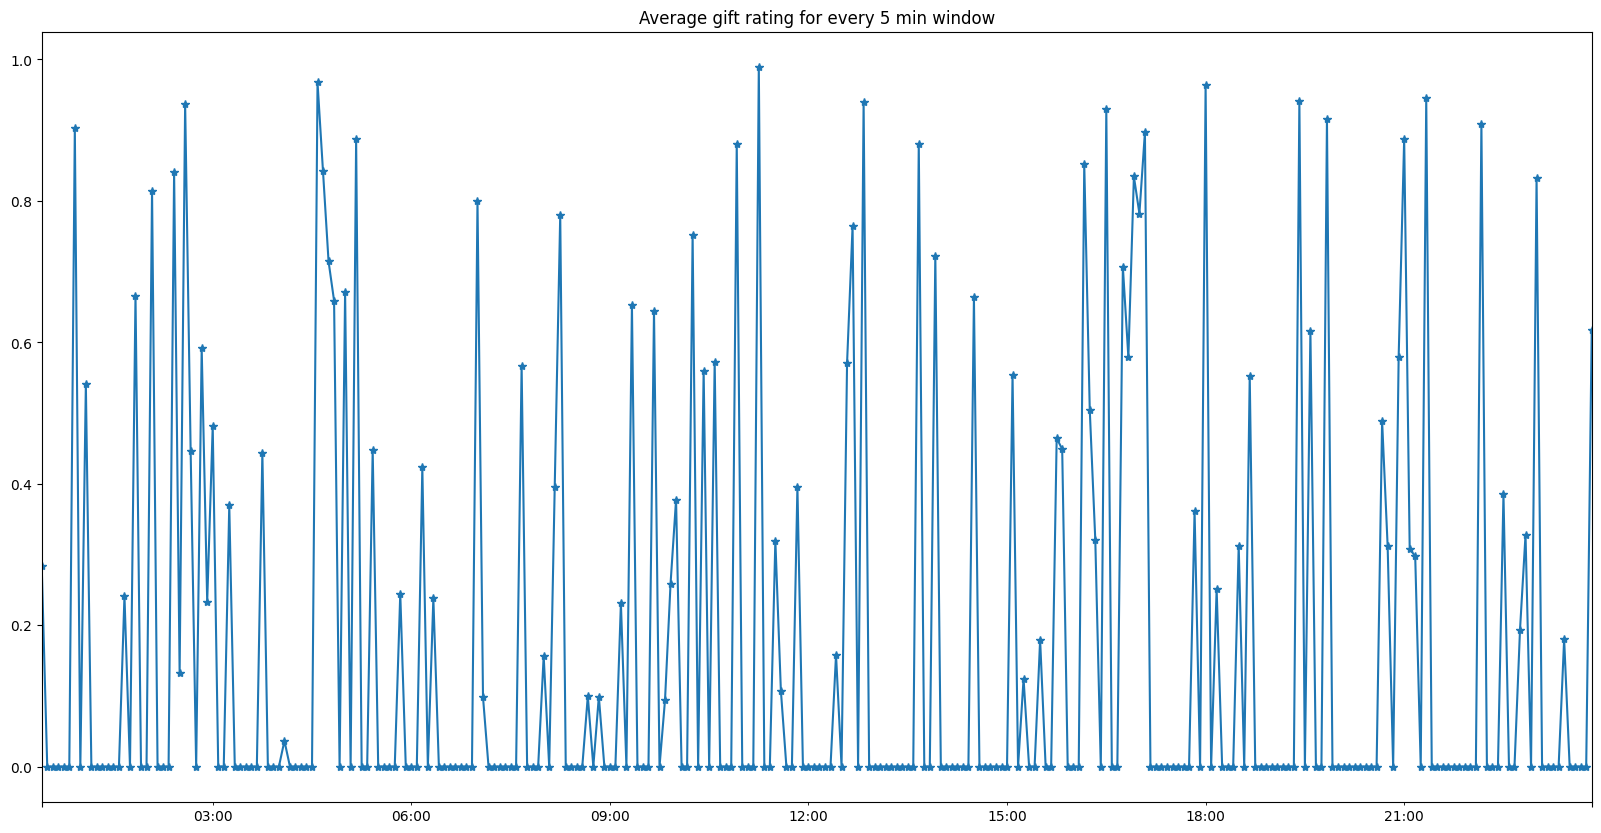

In [9]:
window_es_min.plot(title='Average gift rating for every 5 min window', marker='*', figsize=(20,10))

Now we generate the heart rate per minute dataset. First, we generate random heart rates from 60 to 130 for each minute of the day:

<Axes: title={'center': 'Heart rate per minute'}>

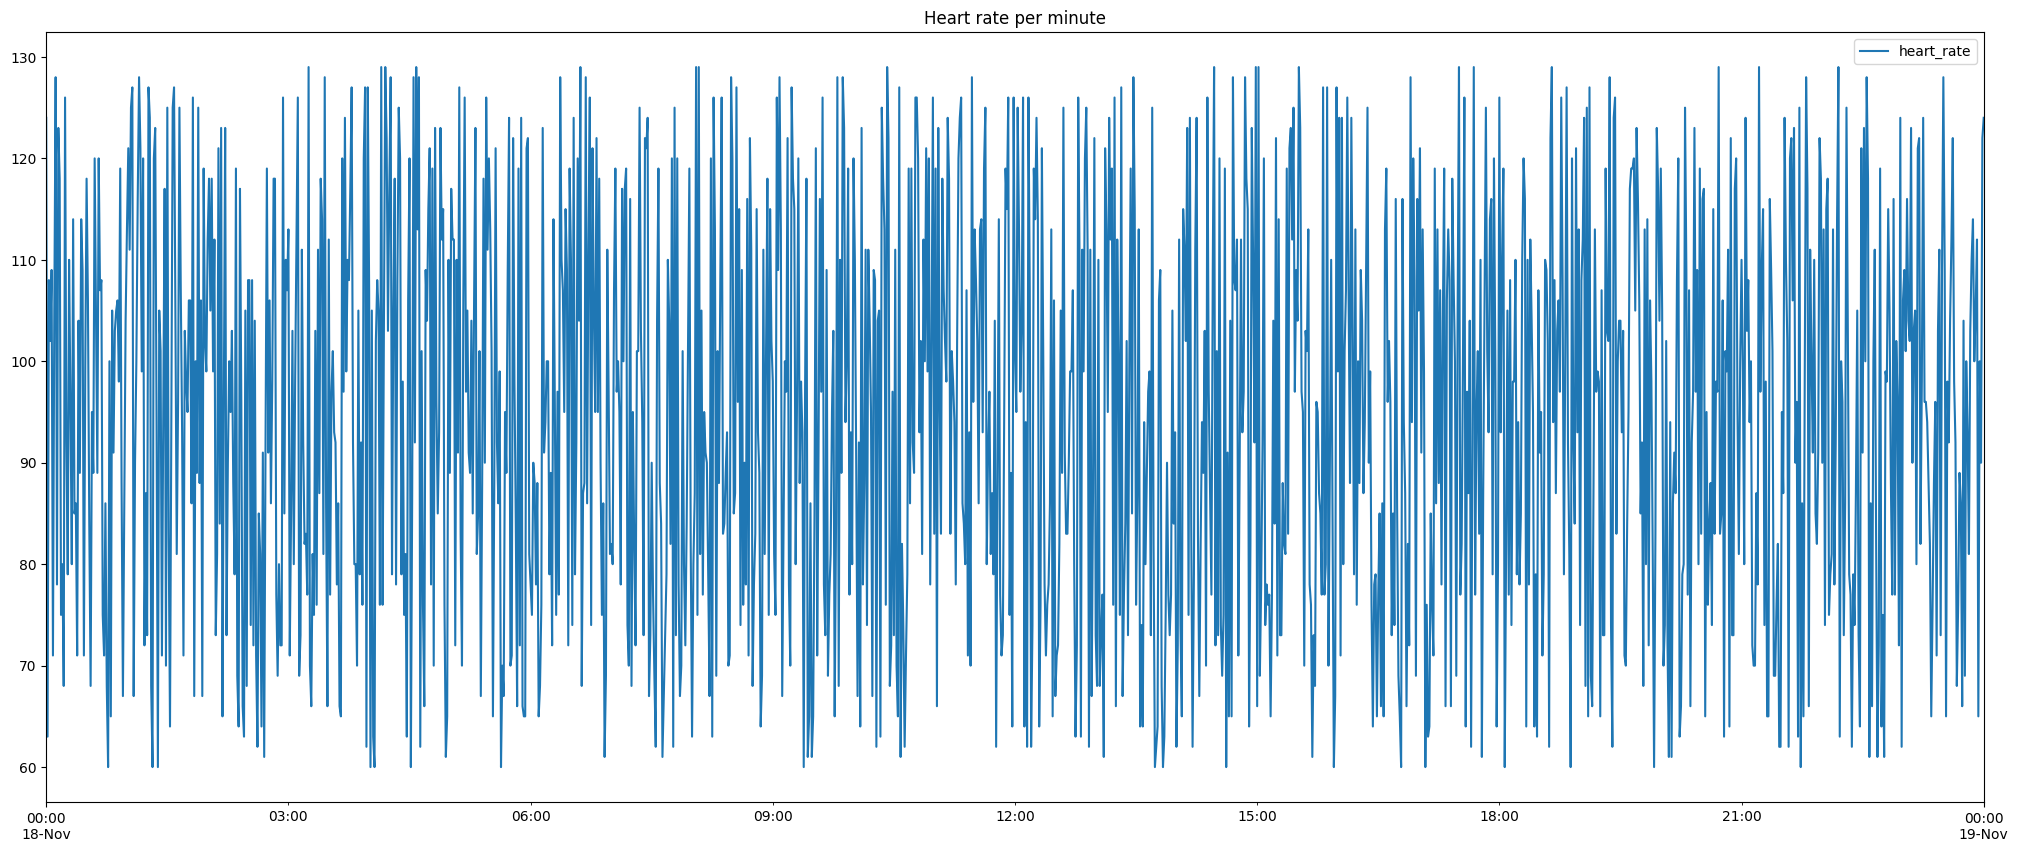

In [10]:
hr_values = np.random.randint(60, 130, size=1441)
hr_values
hr_df = pd.DataFrame({'heart_rate': hr_values}, index=timestamp)
hr_df.sort_index(inplace=True)
hr_df.plot(title='Heart rate per minute', linestyle='-', figsize=[25,10])

The code in the following cell adds to the random heart rates generated in the previous cell so that they make more sense in our context, i.e. heart rate increases when the time gets closer to a gift being given.

In [11]:
avg_hr = (np.sum(hr_values) / hr_values.size).item()

new_hr_values = []
start = 0
for time in gift_df.index:
    t_e = (60 * time.hour) + time.minute
    for t in range(start, t_e+1):
        if t == t_e:
            # add a peak heart rate value of 160 to new_hr_values
            high_hr = np.random.randint(156, 166)
            new_hr_values.append(high_hr)
            start = t + 1
            continue
        else:
            # add 1/t_i-t_e to new_hr_values
            new_hr = round(avg_hr + 60 * (1 / (t_e - t)))
            new_hr_values.append(new_hr)

if t_e+1 <= timestamp.size:
    for i in range(t_e+1, timestamp.size):
        new_hr_values.append(avg_hr)

new_hr_values

[97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 165,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 161,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 159,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 164,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 161,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 164,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 160,
 114,
 124,
 154,
 160,
 109,
 114,
 124,
 154,
 164,
 106,
 109,
 114,
 124,
 154,
 156,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 163,
 124,
 154,
 165,
 103,
 

<Axes: title={'center': 'New heart rate per minute values'}>

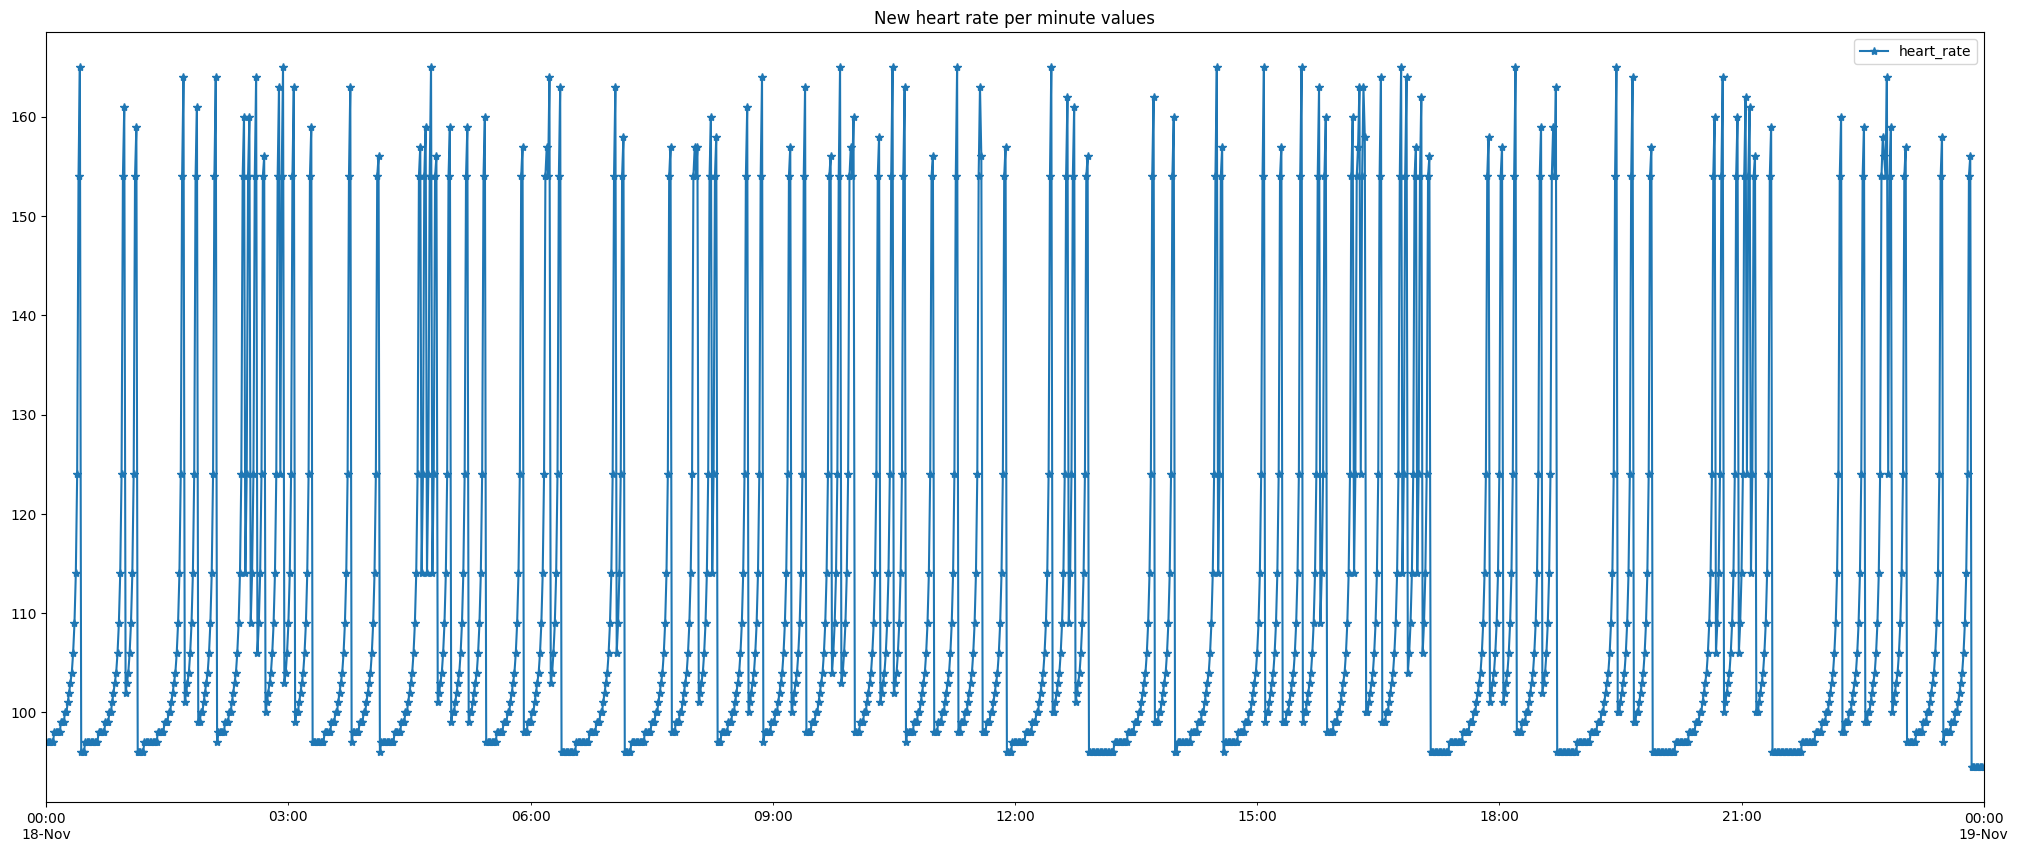

In [12]:
new_hr_df = pd.DataFrame({'heart_rate': new_hr_values}, index=timestamp)
new_hr_df.plot(title='New heart rate per minute values', marker='*', figsize=(25,10))

We create a TimeSeries object with the heart rate dataframe and also specify `np.mean` as the aggregation function:

In [13]:
hr_ts = TimeSeries(new_hr_df, agg_func=np.mean)

<Axes: title={'center': 'Average heart rate (bpm) over each hour'}>

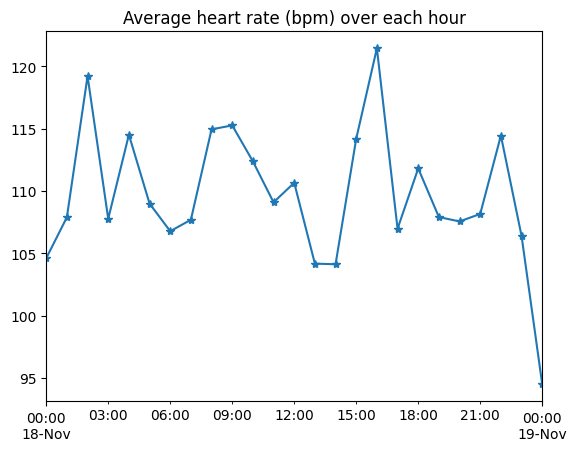

In [14]:
# demo TimeSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

hr_ts.window('1h').plot(title='Average heart rate (bpm) over each hour', marker='*')

<Axes: title={'center': 'Average heart rate (bpm) over each 5 min'}>

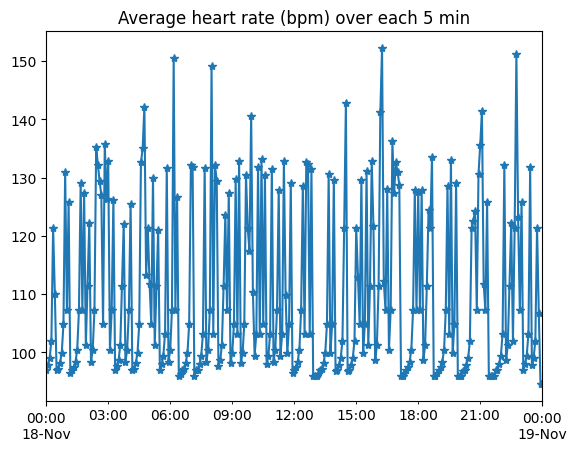

In [15]:
hr_ts.window('5min').plot(title='Average heart rate (bpm) over each 5 min', marker='*')

We then create a TimeFrame object, `tf`, and add the `hr_ts` and `gift_es` objects to it.

In [16]:
tf = TimeFrame()
tf['gift_es'] = gift_es
tf['hr_ts'] = hr_ts

In [17]:
# there's an NaN value for the last timestamp for gift_rating since there are no events 
# at that hour, the last row of the resulting dataframe could be deleted or kept

tf.window('1h')

,gift_rating,heart_rate
1999-11-18 00:00:00,0.593106,104.600000
1999-11-18 01:00:00,0.482579,107.883333
1999-11-18 02:00:00,0.570758,119.200000
1999-11-18 03:00:00,0.431536,107.766667
1999-11-18 04:00:00,0.643838,114.500000
1999-11-18 05:00:00,0.562564,108.983333
1999-11-18 06:00:00,0.361410,106.766667
1999-11-18 07:00:00,0.488420,107.683333
1999-11-18 08:00:00,0.280986,114.933333
1999-11-18 09:00:00,0.375978,115.250000


Then we can make a plot of the aggregated gift events and heart rates windowed according to the frequencies that we specify.

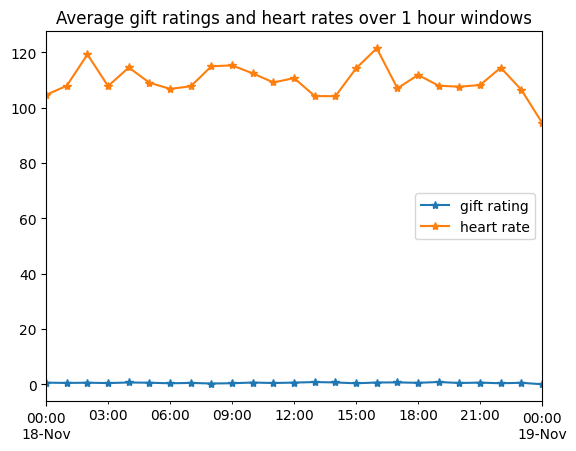

In [18]:
fig, ax = plt.subplots()
tf.window('1h').plot(ax=ax, title='Average gift ratings and heart rates over 1 hour windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

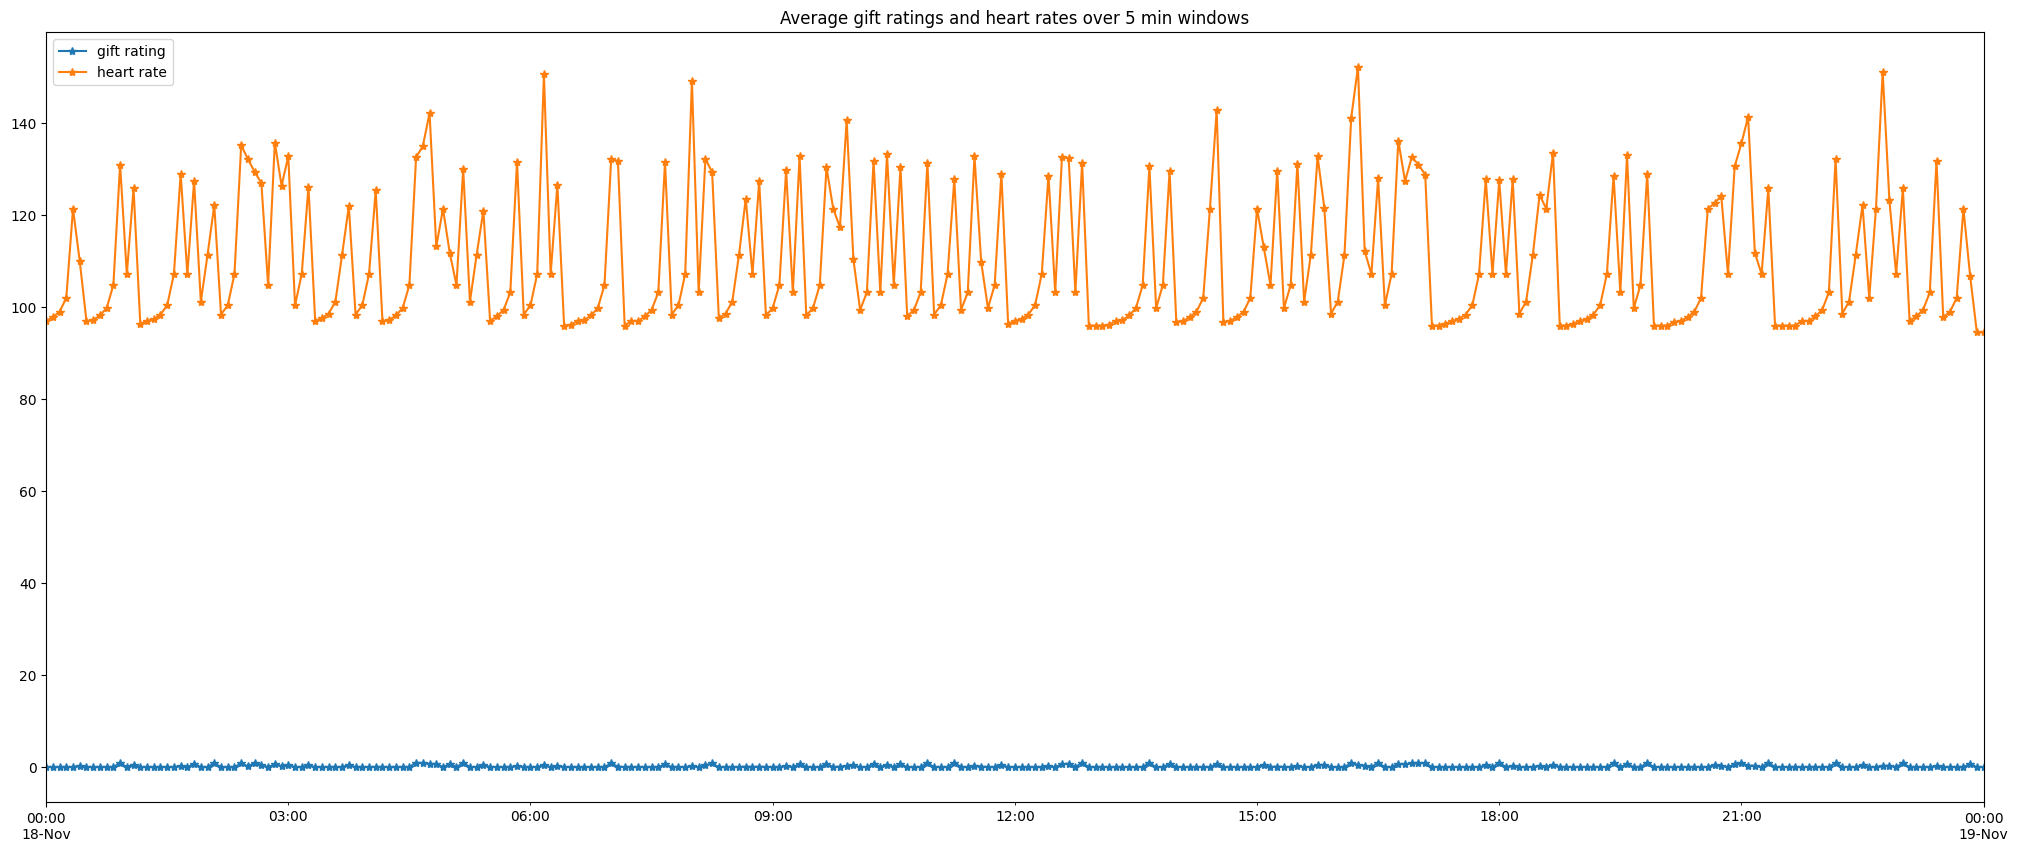

In [19]:
fig, ax = plt.subplots()
tf.window('5min').plot(figsize=(25,10), ax=ax, title='Average gift ratings and heart rates over 5 min windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

Now let's try windowing the heart rate data using the gift event data and the `nonstationary_window` function. First we have to calculate the start and end times of the intervals between events.

In [20]:
gift_es.calc_start_end()
gift_es.ns_window

[(Timestamp('1999-11-18 00:25:00'), Timestamp('1999-11-18 00:58:00')),
 (Timestamp('1999-11-18 00:58:00'), Timestamp('1999-11-18 01:07:00')),
 (Timestamp('1999-11-18 01:07:00'), Timestamp('1999-11-18 01:42:00')),
 (Timestamp('1999-11-18 01:42:00'), Timestamp('1999-11-18 01:52:00')),
 (Timestamp('1999-11-18 01:52:00'), Timestamp('1999-11-18 02:06:00')),
 (Timestamp('1999-11-18 02:06:00'), Timestamp('1999-11-18 02:27:00')),
 (Timestamp('1999-11-18 02:27:00'), Timestamp('1999-11-18 02:31:00')),
 (Timestamp('1999-11-18 02:31:00'), Timestamp('1999-11-18 02:36:00')),
 (Timestamp('1999-11-18 02:36:00'), Timestamp('1999-11-18 02:42:00')),
 (Timestamp('1999-11-18 02:42:00'), Timestamp('1999-11-18 02:53:00')),
 (Timestamp('1999-11-18 02:53:00'), Timestamp('1999-11-18 02:56:00')),
 (Timestamp('1999-11-18 02:56:00'), Timestamp('1999-11-18 03:04:00')),
 (Timestamp('1999-11-18 03:04:00'), Timestamp('1999-11-18 03:17:00')),
 (Timestamp('1999-11-18 03:17:00'), Timestamp('1999-11-18 03:46:00')),
 (Time

Now we window the heart rate time series data using the timestamps of the gift event series data:

In [21]:
ns_window_df = hr_ts.nonstationary_window(gift_es)
ns_window_df

1999-11-18 00:58:00    103.727273
1999-11-18 01:07:00    119.444444
1999-11-18 01:42:00    103.371429
1999-11-18 01:52:00    117.800000
1999-11-18 02:06:00    112.785714
                          ...    
1999-11-18 22:48:00    159.000000
1999-11-18 22:51:00    145.666667
1999-11-18 23:02:00    115.818182
1999-11-18 23:29:00    105.222222
1999-11-18 23:50:00    107.476190
Length: 98, dtype: float64

Let's visualize the windowed data:

<Axes: title={'center': 'Average heart rates in between gift events'}>

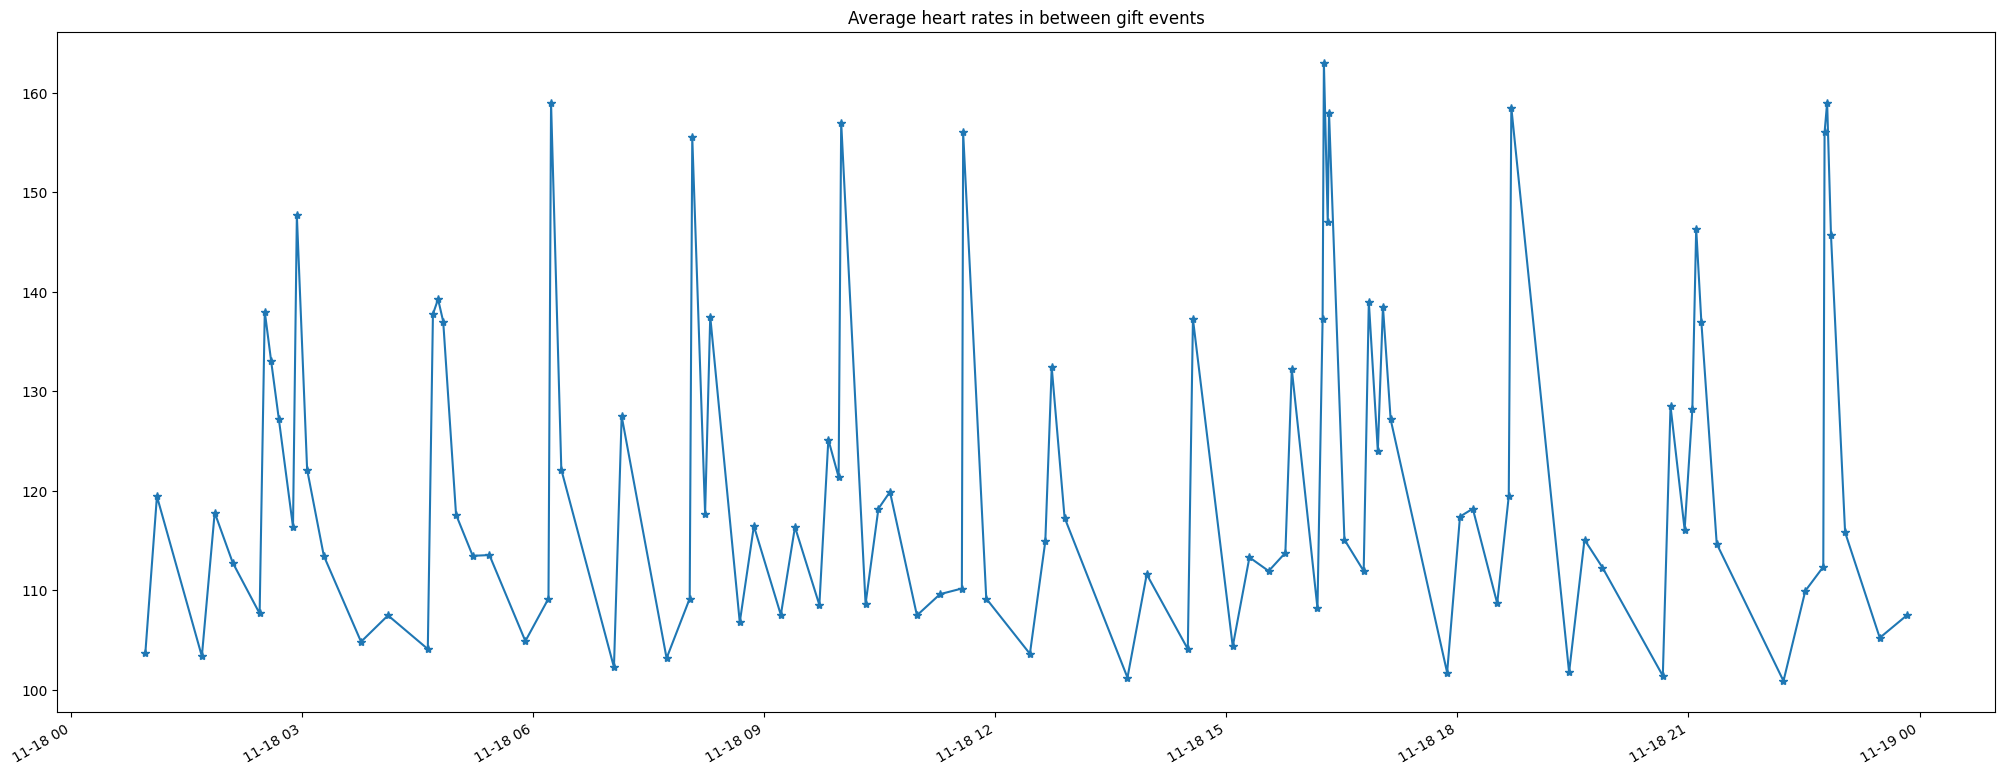

In [25]:
fig, ax = plt.subplots()
# gift_es.data.plot(ax=ax, marker='*')
ns_window_df.plot(figsize=(25,10), ax=ax, title='Average heart rates in between gift events', marker='*')
# ax.legend(['gift rating', 'avg heart rate'])